Project Overview

This initiative centers on the development of RoboNavSim, a straightforward robotic navigation simulator that illustrates how an autonomous robot navigates through an environment, identifies obstacles, and makes real-time decisions. The simulator replicates fundamental robot actions—like movement, turning, and avoiding collisions—enabling us to evaluate navigation strategies without the requirement for physical equipment. The project's aim is to highlight essential AI and robotics principles, encompassing sensors, control logic, environment modeling, and autonomous decision-making, all within a user-friendly simulation framework.

1. Importation Of Numpy An d Matplotlib

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Step 2. Create a 3D Environment + 3D Robot


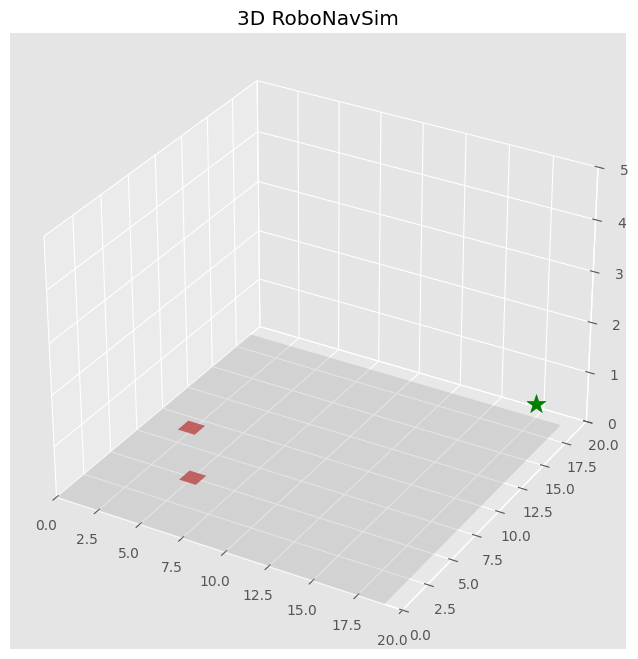

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Environment size
size = 20

# Robot starting position in 3D (x, y, z)
robot_pos = np.array([5, 5, 0])

# Target position
goal_pos = np.array([18, 18, 0])

def draw_robot(ax, pos, color="red"):
    """Draw a 3D cube robot at position pos."""
    r = 0.5  # robot radius
    x, y, z = pos

    # Cube vertices defining the base corners
    X = [x - r, x + r]
    Y = [y - r, y + r]
    # Scalar z values for the bottom and top surfaces
    z_bottom = z
    z_top = z + 1

    # Create meshgrid for the (x, y) coordinates of the surface
    xx, yy = np.meshgrid(X, Y)

    # Plot bottom surface: convert scalar z_bottom to a 2D array for plot_surface
    ax.plot_surface(xx, yy, z_bottom * np.ones_like(xx), color=color, alpha=0.7)
    # Plot top surface: convert scalar z_top to a 2D array for plot_surface
    ax.plot_surface(xx, yy, z_top * np.ones_like(xx), color=color, alpha=0.7)

def draw_scene(robot_pos, title="3D RoboNavSim"):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    # Ground plane
    X, Y = np.meshgrid(np.arange(0, size), np.arange(0, size))
    Z = np.zeros_like(X)
    ax.plot_surface(X, Y, Z, color="lightgray", alpha=0.3)

    # Draw robot
    draw_robot(ax, robot_pos)

    # Draw goal
    ax.scatter(goal_pos[0], goal_pos[1], 0.5, color="green", s=200, marker="*")

    ax.set_title(title)
    ax.set_xlim(0, size)
    ax.set_ylim(0, size)
    ax.set_zlim(0, 5)
    plt.show()

draw_scene(robot_pos)

Step 3: Add a simple “brain” for the robot

In [23]:
def greedy_step(pos, goal):
    """
    Move the robot one step closer to the goal.
    Uses a simple greedy strategy (no obstacles yet):
    - Compare current position to goal
    - Move +1, -1, or 0 along each axis toward the goal
    """
    direction = goal - pos
    step = np.sign(direction)   # -1, 0, or 1 for each axis
    new_pos = pos + step

    # Keep robot inside the environment bounds
    new_pos[0] = np.clip(new_pos[0], 0, size - 1)
    new_pos[1] = np.clip(new_pos[1], 0, size - 1)
    # z stays on the ground for now
    new_pos[2] = 0

    return new_pos

Step 4. Make the Robot Move in 3D

This movement uses a simple greedy algorithm



In [25]:
def greedy_step(pos, goal):
    """Move the robot one step closer to the goal."""
    direction = goal - pos
    step = np.sign(direction)
    return pos + step

# Ensure robot_pos is a 3D array, consistent with goal_pos
if robot_pos.shape == (2,):
    robot_pos = np.append(robot_pos, 0)

path = [robot_pos.copy()]

for i in range(20):
    robot_pos = greedy_step(robot_pos, goal_pos)
    path.append(robot_pos.copy())

B. Simulate the robot moving toward the goal

In [26]:
# Reset starting position
robot_pos = np.array([5, 5, 0])

path = [robot_pos.copy()]
max_steps = 30  # you can increase this if needed

for i in range(max_steps):
    robot_pos = greedy_step(robot_pos, goal_pos)
    path.append(robot_pos.copy())

path = np.array(path)
len(path), path[:5]  # quick check

(31,
 array([[5, 5, 0],
        [6, 6, 0],
        [7, 7, 0],
        [8, 8, 0],
        [9, 9, 0]]))

4. Visualizing the full path in 3D of the Robot

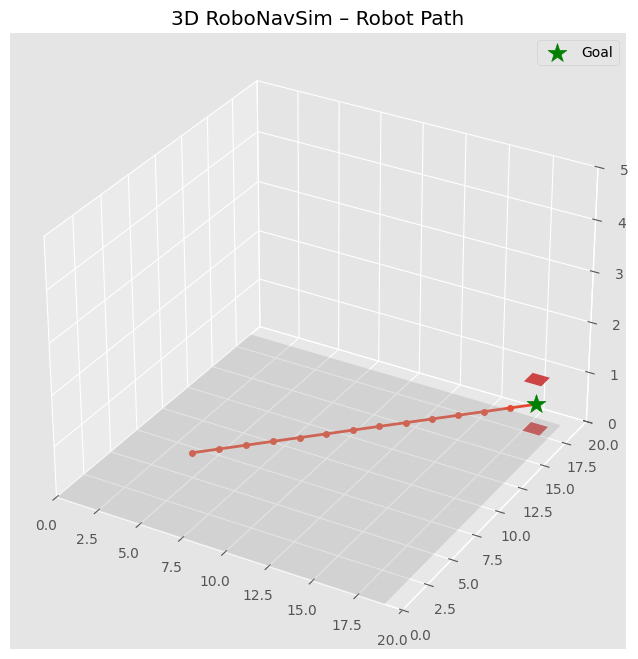

In [27]:
def draw_scene_with_path(path, title="3D RoboNavSim – Robot Path"):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    # Ground plane
    X, Y = np.meshgrid(np.arange(0, size), np.arange(0, size))
    Z = np.zeros_like(X)
    ax.plot_surface(X, Y, Z, color="lightgray", alpha=0.3)

    # Plot path as a line
    xs = path[:, 0]
    ys = path[:, 1]
    zs = path[:, 2] + 0.5  # lift a bit above the ground so it’s visible
    ax.plot(xs, ys, zs, linewidth=2, marker="o", markersize=4)

    # Draw final robot position as cube
    draw_robot(ax, path[-1])

    # Draw goal
    ax.scatter(goal_pos[0], goal_pos[1], 0.5, color="green", s=200, marker="*", label="Goal")

    ax.set_title(title)
    ax.set_xlim(0, size)
    ax.set_ylim(0, size)
    ax.set_zlim(0, 5)
    ax.legend()
    plt.show()

draw_scene_with_path(path)

Step 5: Adding A 3D Obstacles to the Environment

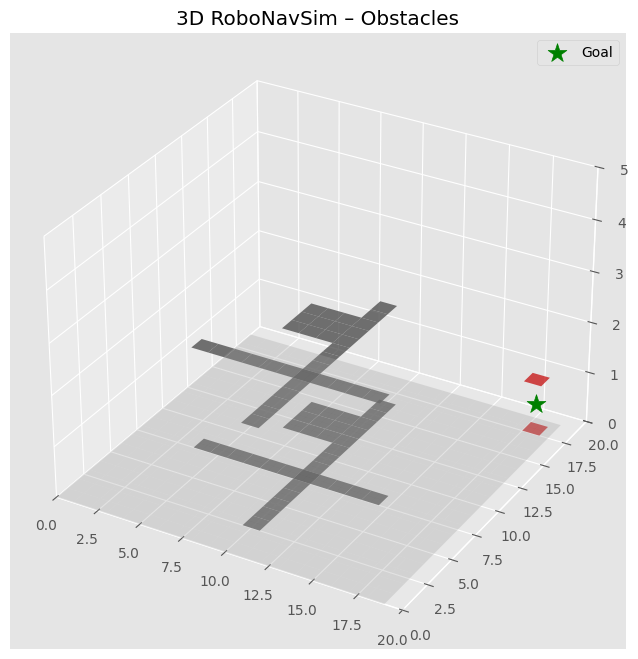

In [28]:
# Define some 3D obstacles as (x, y) positions on the ground
obstacles = []

# Example: vertical wall
for y in range(3, 17):
    obstacles.append((10, y))

# Example: horizontal wall
for x in range(4, 15):
    obstacles.append((x, 8))

# Example: a small block near the middle
for x in range(7, 10):
    for y in range(12, 15):
        obstacles.append((x, y))

# Make sure we don't block the goal directly
if (goal_pos[0], goal_pos[1]) in obstacles:
    obstacles.remove((goal_pos[0], goal_pos[1]))


def draw_obstacle_cube(ax, x, y, height=2, color="gray"):
    """Draw a 3D cube obstacle at grid position (x, y)."""
    r = 0.5
    X = [x - r, x + r]
    Y = [y - r, y + r]
    z_bottom = 0
    z_top = height

    xx, yy = np.meshgrid(X, Y)
    ax.plot_surface(xx, yy, z_bottom * np.ones_like(xx), color=color, alpha=0.8)
    ax.plot_surface(xx, yy, z_top * np.ones_like(xx), color=color, alpha=0.8)


def draw_scene_with_obstacles(robot_pos, title="3D RoboNavSim – Obstacles"):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    # Ground plane
    X, Y = np.meshgrid(np.arange(0, size), np.arange(0, size))
    Z = np.zeros_like(X)
    ax.plot_surface(X, Y, Z, color="lightgray", alpha=0.3)

    # Draw obstacles
    for (ox, oy) in obstacles:
        draw_obstacle_cube(ax, ox, oy, height=2, color="dimgray")

    # Draw robot
    draw_robot(ax, robot_pos)

    # Draw goal
    ax.scatter(goal_pos[0], goal_pos[1], 0.5, color="green", s=200, marker="*", label="Goal")

    ax.set_title(title)
    ax.set_xlim(0, size)
    ax.set_ylim(0, size)
    ax.set_zlim(0, 5)
    ax.legend()
    plt.show()


# Quick check
draw_scene_with_obstacles(robot_pos)

Step 6: Smarter Step Function with Obstacles Avoidance
We upgrade the robot’s “brain” to:

Look at neighboring cells

Avoiding cells that contain obstacles

Move closer to the goal (greedy strategy)

In [29]:
def is_obstacle(pos):
    """Check if (x, y) position contains an obstacle."""
    x, y, _ = pos
    return (int(x), int(y)) in obstacles


def smart_step(pos, goal):
    """
    Next-level step:
    - Robot considers possible moves (stay, up, down, left, right, diagonals)
    - Filters out moves that hit obstacles or go out of bounds
    - Picks the move that reduces distance to the goal the most
    """
    moves = [
        np.array([0, 0, 0]),   # stay
        np.array([1, 0, 0]),   # +x
        np.array([-1, 0, 0]),  # -x
        np.array([0, 1, 0]),   # +y
        np.array([0, -1, 0]),  # -y
        np.array([1, 1, 0]),   # diag
        np.array([1, -1, 0]),
        np.array([-1, 1, 0]),
        np.array([-1, -1, 0])
    ]

    candidates = []
    for m in moves:
        new_pos = pos + m

        # Keep inside bounds
        new_pos[0] = np.clip(new_pos[0], 0, size - 1)
        new_pos[1] = np.clip(new_pos[1], 0, size - 1)
        new_pos[2] = 0  # keep on ground

        # Skip positions with obstacles
        if is_obstacle(new_pos):
            continue

        candidates.append(new_pos)

    if not candidates:
        # Nowhere to go, stuck
        return pos

    # Choose candidate that minimizes Euclidean distance to the goal
    best_pos = None
    best_dist = float("inf")
    for c in candidates:
        dist = np.linalg.norm(goal - c)
        if dist < best_dist:
            best_dist = dist
            best_pos = c

    return best_pos

Step 6 – Run a “Next-Level” Simulation with Obstacles

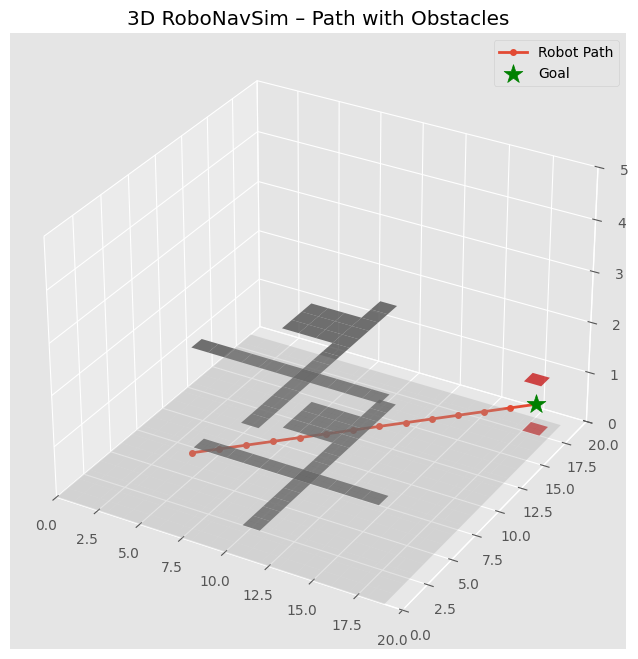

In [30]:
def draw_scene_with_obstacles_and_path(path, title="3D RoboNavSim – Path with Obstacles"):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    # Ground plane
    X, Y = np.meshgrid(np.arange(0, size), np.arange(0, size))
    Z = np.zeros_like(X)
    ax.plot_surface(X, Y, Z, color="lightgray", alpha=0.3)

    # Draw obstacles
    for (ox, oy) in obstacles:
        draw_obstacle_cube(ax, ox, oy, height=2, color="dimgray")

    # Plot path
    xs = path[:, 0]
    ys = path[:, 1]
    zs = path[:, 2] + 0.5  # slightly above ground
    ax.plot(xs, ys, zs, linewidth=2, marker="o", markersize=4, label="Robot Path")

    # Draw final robot
    draw_robot(ax, path[-1])

    # Draw goal
    ax.scatter(goal_pos[0], goal_pos[1], 0.5, color="green", s=200, marker="*", label="Goal")

    ax.set_title(title)
    ax.set_xlim(0, size)
    ax.set_ylim(0, size)
    ax.set_zlim(0, 5)
    ax.legend()
    plt.show()

draw_scene_with_obstacles_and_path(path)

Step 8: Updated Metrics Ad Robot Navigation Around Obtacles towards our Goals

In [32]:
reached_goal = np.array_equal(path[-1], goal_pos)
print("=== 3D RoboNavSim – Obstacle-Aware Simulation Summary ===")
print(f"Start position:   {path[0]}")
print(f"Goal position:    {goal_pos}")
print(f"Final position:   {path[-1]}")
print(f"Steps taken:      {len(path) - 1}")
print(f"Reached goal?     {reached_goal}")
print(f"Number of obstacles: {len(obstacles)}")


=== 3D RoboNavSim – Obstacle-Aware Simulation Summary ===
Start position:   [5 5 0]
Goal position:    [18 18  0]
Final position:   [18 18  0]
Steps taken:      30
Reached goal?     True
Number of obstacles: 34


Now we will make a robot feel more real by giving it:

A “sensor” (it only reacts to obstacles within a radius)

Slight movement noise (to simulate imperfect motors)

Metrics.

Step 10: adding a Sensor Model to the Robot

In [33]:
def sense_obstacles(pos, sense_radius=5.0):
    """
    Simulate a simple 2D sensor around the robot.
    Returns a list of obstacles within 'sense_radius' distance.
    """
    x, y, _ = pos
    sensed = []
    for (ox, oy) in obstacles:
        dist = np.sqrt((ox - x)**2 + (oy - y)**2)
        if dist <= sense_radius:
            sensed.append(((ox, oy), dist))
    return sensed

Step 11: New Step Function Using Sensing + Small Noise This Level 3 Brain of the Robot.

In [34]:
def smart_step_with_sensing(pos, goal, sense_radius=5.0, noise_std=0.0):
    """
    Next-level navigation:
    - Robot senses nearby obstacles within 'sense_radius'
    - Avoids moves that go too close to sensed obstacles
    - Still tries to move closer to the goal (greedy)
    - Optional Gaussian noise simulates imperfect movement
    """
    moves = [
        np.array([0, 0, 0]),   # stay
        np.array([1, 0, 0]),
        np.array([-1, 0, 0]),
        np.array([0, 1, 0]),
        np.array([0, -1, 0]),
        np.array([1, 1, 0]),
        np.array([1, -1, 0]),
        np.array([-1, 1, 0]),
        np.array([-1, -1, 0])
    ]

    # Sense nearby obstacles
    sensed = sense_obstacles(pos, sense_radius=sense_radius)
    sensed_positions = [p for (p, d) in sensed]

    candidates = []
    for m in moves:
        new_pos = pos + m

        # Add small noise to simulate imperfect movement
        if noise_std > 0:
            noise = np.random.normal(0, noise_std, size=3)
            new_pos = new_pos + noise

        # Keep inside bounds
        new_pos[0] = np.clip(new_pos[0], 0, size - 1)
        new_pos[1] = np.clip(new_pos[1], 0, size - 1)
        new_pos[2] = 0  # stay on ground

        # Block positions with actual obstacles
        if is_obstacle(new_pos):
            continue

        # Also avoid getting too close to sensed obstacles (< 1.0 units)
        too_close = False
        for (ox, oy) in sensed_positions:
            dist = np.sqrt((ox - new_pos[0])**2 + (oy - new_pos[1])**2)
            if dist < 1.0:
                too_close = True
                break
        if too_close:
            continue

        candidates.append(new_pos)

    if not candidates:
        # No safe moves, stay in place
        return pos

    # Choose candidate that minimizes distance to goal
    best_pos = None
    best_cost = float("inf")
    for c in candidates:
        dist_goal = np.linalg.norm(goal - c)
        if dist_goal < best_cost:
            best_cost = dist_goal
            best_pos = c

    return best_pos

Step 12: Run a Level 3 Simulation + Log Metrics

In [35]:
def min_distance_to_obstacles(pos):
    """Compute distance from robot to the closest obstacle."""
    x, y, _ = pos
    if not obstacles:
        return np.inf
    dists = [np.sqrt((ox - x)**2 + (oy - y)**2) for (ox, oy) in obstacles]
    return min(dists)

# Reset start
robot_pos = np.array([5, 5, 0])

path_level3 = [robot_pos.copy()]
min_dists = [min_distance_to_obstacles(robot_pos)]
max_steps = 100

for i in range(max_steps):
    if np.array_equal(robot_pos, goal_pos):
        break

    robot_pos = smart_step_with_sensing(
        robot_pos,
        goal_pos,
        sense_radius=5.0,   # how far the robot "sees"
        noise_std=0.1       # small movement noise
    )
    path_level3.append(robot_pos.copy())
    min_dists.append(min_distance_to_obstacles(robot_pos))

path_level3 = np.array(path_level3)
len(path_level3), path_level3[:5]

(101,
 array([[5.        , 5.        , 0.        ],
        [5.94377125, 5.89871689, 0.        ],
        [6.93220642, 6.86860652, 0.        ],
        [7.90128518, 6.90173286, 0.        ],
        [8.82043582, 6.85155716, 0.        ]]))

🔹 Step 14 – Visualize Path + Obstacles Level 3

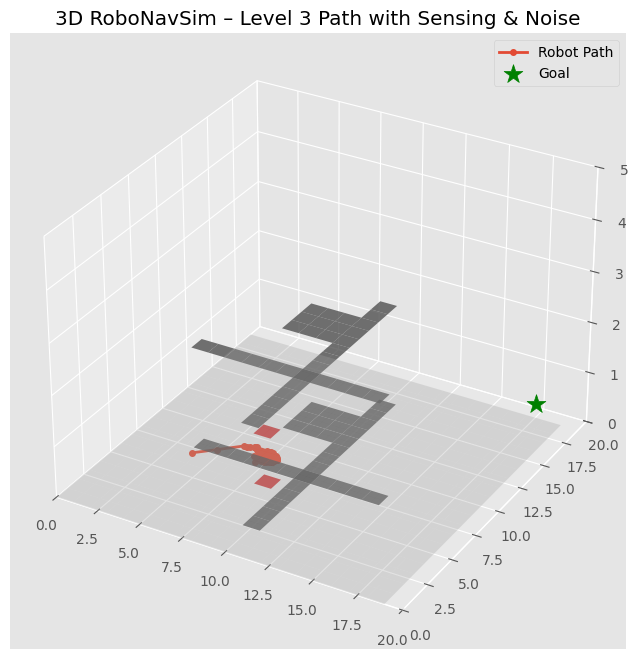

In [36]:
draw_scene_with_obstacles_and_path(path_level3,
    title="3D RoboNavSim – Level 3 Path with Sensing & Noise")

Step 14: Plot a Metric: Distance to Obstacles per Step

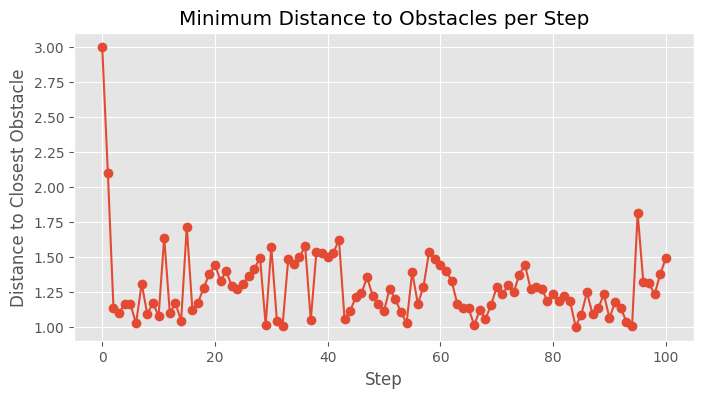

In [37]:
plt.figure(figsize=(8,4))
plt.plot(min_dists, marker="o")
plt.title("Minimum Distance to Obstacles per Step")
plt.xlabel("Step")
plt.ylabel("Distance to Closest Obstacle")
plt.grid(True)
plt.show()

Step 15: Updated Simulation Summary

In [38]:
reached_goal_lvl3 = np.array_equal(path_level3[-1].round().astype(int),
                                   goal_pos)

print("=== 3D RoboNavSim – Level 3 Simulation Summary ===")
print(f"Start position:          {path_level3[0]}")
print(f"Goal position:           {goal_pos}")
print(f"Final position:          {path_level3[-1]}")
print(f"Steps taken:             {len(path_level3) - 1}")
print(f"Reached goal?            {reached_goal_lvl3}")
print(f"Number of obstacles:     {len(obstacles)}")
print(f"Average min dist (safety): {np.mean(min_dists):.2f}")
print(f"Min distance ever:       {np.min(min_dists):.2f}")

=== 3D RoboNavSim – Level 3 Simulation Summary ===
Start position:          [5. 5. 0.]
Goal position:           [18 18  0]
Final position:          [8.50350017 6.59413286 0.        ]
Steps taken:             100
Reached goal?            False
Number of obstacles:     34
Average min dist (safety): 1.29
Min distance ever:       1.00


Step 16: Path Planner on the Grid

In [39]:
import heapq

def astar(start, goal, obstacles, grid_size):
    """
    A* pathfinding on a 2D grid (x, y).
    - start, goal: (x, y) integer tuples
    - obstacles: list of (x, y) tuples
    - grid_size: size of the square grid (0..size-1)
    Returns a list of (x, y) from start to goal, or [] if no path.
    """
    start = tuple(start)
    goal = tuple(goal)
    obstacle_set = set(obstacles)

    def in_bounds(x, y):
        return 0 <= x < grid_size and 0 <= y < grid_size

    def neighbors(node):
        x, y = node
        steps = [
            (1, 0), (-1, 0), (0, 1), (0, -1),
            (1, 1), (1, -1), (-1, 1), (-1, -1)
        ]
        for dx, dy in steps:
            nx, ny = x + dx, y + dy
            if in_bounds(nx, ny) and (nx, ny) not in obstacle_set:
                yield (nx, ny)

    def heuristic(a, b):
        # Euclidean distance
        return ((a[0] - b[0])**2 + (a[1] - b[1])**2) ** 0.5

    open_set = []
    heapq.heappush(open_set, (0, start))

    came_from = {}
    g_score = {start: 0}

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            # reconstruct path
            path = [current]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for nbr in neighbors(current):
            tentative_g = g_score[current] + 1  # cost for each step = 1
            if nbr not in g_score or tentative_g < g_score[nbr]:
                came_from[nbr] = current
                g_score[nbr] = tentative_g
                f_score = tentative_g + heuristic(nbr, goal)
                heapq.heappush(open_set, (f_score, nbr))

    # no path found
    return []

Step 17: Run A from Start to Goal

In [42]:
# Use integer (x, y) positions for planning
start_xy = (int(path_level3[0][0]), int(path_level3[0][1]))
goal_xy = (int(goal_pos[0]), int(goal_pos[1]))
astar_path_xy = astar(start_xy, goal_xy, obstacles, size)

len(astar_path_xy), astar_path_xy[:10]

(22,
 [(5, 5),
  (5, 6),
  (4, 7),
  (3, 8),
  (4, 9),
  (5, 10),
  (6, 11),
  (6, 12),
  (6, 13),
  (6, 14)])

1. Converting A Path to 3D

In [44]:
# Convert A* 2D path into 3D path with z=0
astar_path_3d = np.array([[x, y, 0] for (x, y) in astar_path_xy])
astar_path_3d[:5]

array([[5, 5, 0],
       [5, 6, 0],
       [4, 7, 0],
       [3, 8, 0],
       [4, 9, 0]])

2. Visualize A* Path Alone (Global Planner)

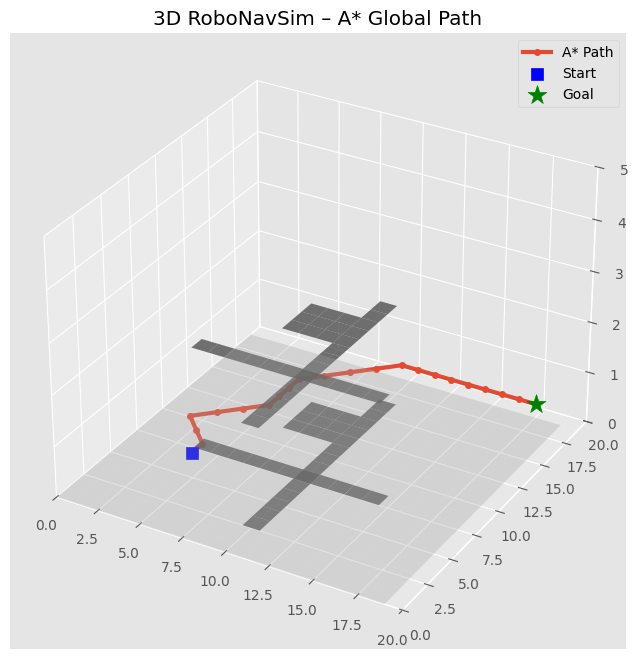

In [45]:
def draw_scene_with_astar_path(path_3d, title="3D RoboNavSim – A* Global Path"):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    # Ground plane
    X, Y = np.meshgrid(np.arange(0, size), np.arange(0, size))
    Z = np.zeros_like(X)
    ax.plot_surface(X, Y, Z, color="lightgray", alpha=0.3)

    # Draw obstacles
    for (ox, oy) in obstacles:
        draw_obstacle_cube(ax, ox, oy, height=2, color="dimgray")

    if len(path_3d) > 0:
        xs = path_3d[:, 0]
        ys = path_3d[:, 1]
        zs = path_3d[:, 2] + 0.5
        ax.plot(xs, ys, zs, linewidth=3, marker="o", markersize=4, label="A* Path")

        # Draw start and goal
        ax.scatter(xs[0], ys[0], zs[0], color="blue", s=80, marker="s", label="Start")
        ax.scatter(goal_pos[0], goal_pos[1], 0.5, color="green", s=200, marker="*", label="Goal")
    else:
        ax.text(size/2, size/2, 1, "No path found", color="red")

    ax.set_title(title)
    ax.set_xlim(0, size)
    ax.set_ylim(0, size)
    ax.set_zlim(0, 5)
    ax.legend()
    plt.show()

draw_scene_with_astar_path(astar_path_3d)

3. Compare A* Path vs Level 3 Path in One Plot


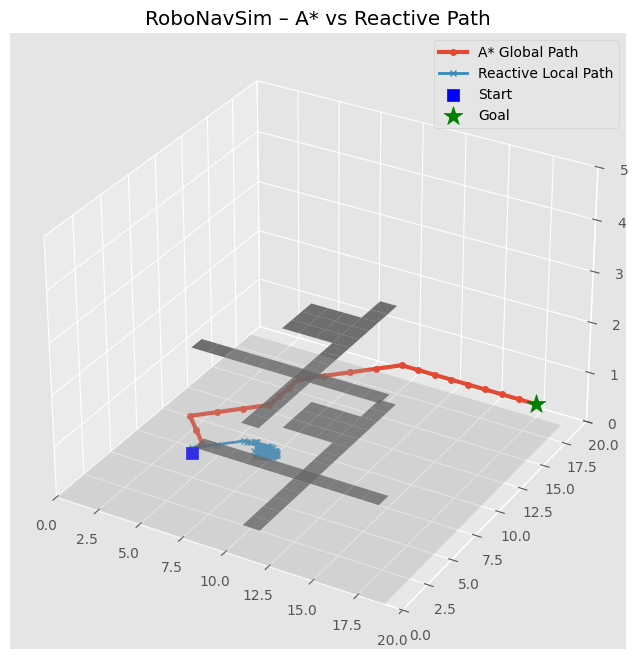

In [46]:
def compare_astar_and_level3(astar_3d, level3_3d, title="RoboNavSim – A* vs Reactive Path"):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    # Ground plane
    X, Y = np.meshgrid(np.arange(0, size), np.arange(0, size))
    Z = np.zeros_like(X)
    ax.plot_surface(X, Y, Z, color="lightgray", alpha=0.3)

    # Obstacles
    for (ox, oy) in obstacles:
        draw_obstacle_cube(ax, ox, oy, height=2, color="dimgray")

    # A* path
    if len(astar_3d) > 0:
        ax.plot(
            astar_3d[:,0], astar_3d[:,1], astar_3d[:,2] + 0.5,
            linewidth=3, marker="o", markersize=4, label="A* Global Path"
        )

    # Level 3 reactive path
    ax.plot(
        level3_3d[:,0], level3_3d[:,1], level3_3d[:,2] + 0.6,
        linewidth=2, marker="x", markersize=4, label="Reactive Local Path"
    )

    # Start & goal
    ax.scatter(level3_3d[0,0], level3_3d[0,1], 0.5, color="blue", s=80, marker="s", label="Start")
    ax.scatter(goal_pos[0], goal_pos[1], 0.5, color="green", s=200, marker="*", label="Goal")

    ax.set_title(title)
    ax.set_xlim(0, size)
    ax.set_ylim(0, size)
    ax.set_zlim(0, 5)
    ax.legend()
    plt.show()

compare_astar_and_level3(astar_path_3d, path_level3)

Leve 4:
 Step 1 – Define a Discrete RL Environment
We will treat the floor as a 2D gridworld: each (x,y) is a state, and the agent can move in 8 directions

In [47]:
# RL environment helpers

ACTIONS = [
    (1, 0),   # right
    (-1, 0),  # left
    (0, 1),   # up
    (0, -1),  # down
    (1, 1),   # diag up-right
    (1, -1),  # diag down-right
    (-1, 1),  # diag up-left
    (-1, -1)  # diag down-left
]
NUM_ACTIONS = len(ACTIONS)

obstacle_set = set(obstacles)
goal_xy = (int(goal_pos[0]), int(goal_pos[1]))

def in_bounds(x, y):
    return 0 <= x < size and 0 <= y < size

def step_env(state, action_index):
    """
    Environment transition for RL.
    state: (x, y)
    action_index: index into ACTIONS
    Returns: next_state (x,y), reward, done
    """
    x, y = state
    dx, dy = ACTIONS[action_index]
    nx, ny = x + dx, y + dy

    # Keep in bounds
    if not in_bounds(nx, ny):
        # Penalize hitting boundary & stay in place
        return (x, y), -5.0, False

    # If hits obstacle
    if (nx, ny) in obstacle_set:
        # Strong penalty, but we stay in place
        return (x, y), -10.0, False

    # Valid move
    new_state = (nx, ny)

    # Goal?
    if new_state == goal_xy:
        return new_state, 100.0, True  # big reward

    # Otherwise small negative reward per step to encourage shorter paths
    return new_state, -1.0, False

Step 2: Initialize Q-table

In [48]:
# Q-table: shape (size, size, NUM_ACTIONS)
Q = np.zeros((size, size, NUM_ACTIONS), dtype=float)

def state_to_idx(state):
    x, y = state
    return int(x), int(y)

Step 3 – Q-learning Training Loop

In [50]:
import random

num_episodes = 500       # you can increase to 1000 if needed
max_steps_per_episode = 200

alpha = 0.1              # learning rate
gamma = 0.95             # discount factor
épsilon_start = 1.0
épsilon_end = 0.05
épsilon_decay = 0.995

épisode_rewards = []

épsilon = epsilon_start

for ep in range(num_episodes):
    # Start at fixed start position (same as your earlier robot)
    state = (int(path_level3[0][0]), int(path_level3[0][1]))
    total_reward = 0.0

    for step in range(max_steps_per_episode):
        x, y = state

        # ε-greedy: pick random action or best action
        if random.random() < epsilon:
            action_idx = random.randint(0, NUM_ACTIONS - 1)
        else:
            action_idx = int(np.argmax(Q[x, y, :]))

        next_state, reward, done = step_env(state, action_idx)
        nx, ny = next_state

        # Q-learning update
        best_next_q = np.max(Q[nx, ny, :])
        td_target = reward + gamma * best_next_q
        td_error = td_target - Q[x, y, action_idx]

        Q[x, y, action_idx] += alpha * td_error

        state = next_state
        total_reward += reward

        if done:
            break

    # Decay epsilon
    epsilon = max(epsilon_end, epsilon * epsilon_decay)
    episode_rewards.append(total_reward)

    if (ep + 1) % 50 == 0:
        print(f"Episode {ep+1}/{num_episodes}, total reward: {total_reward:.1f}, epsilon: {epsilon:.3f}")

Episode 50/500, total reward: -366.0, epsilon: 0.778
Episode 100/500, total reward: -288.0, epsilon: 0.606
Episode 150/500, total reward: -65.0, epsilon: 0.471
Episode 200/500, total reward: -252.0, epsilon: 0.367
Episode 250/500, total reward: -244.0, epsilon: 0.286
Episode 300/500, total reward: -245.0, epsilon: 0.222
Episode 350/500, total reward: -94.0, epsilon: 0.173
Episode 400/500, total reward: -204.0, epsilon: 0.135
Episode 450/500, total reward: -39.0, epsilon: 0.105
Episode 500/500, total reward: -68.0, epsilon: 0.082


Step 5: Extract a Greedy Policy Path After Training

In [52]:
def run_greedy_policy(max_steps=200):
    state = (int(path_level3[0][0]), int(path_level3[0][1]))
    path = [state]
    for _ in range(max_steps):
        x, y = state
        action_idx = int(np.argmax(Q[x, y, :]))
        next_state, reward, done = step_env(state, action_idx)
        path.append(next_state)
        state = next_state
        if done:
            break
    return path

rl_path_xy = run_greedy_policy(max_steps=200)
len(rl_path_xy), rl_path_xy[:10]

(201,
 [(5, 5),
  (6, 5),
  (5, 6),
  (5, 7),
  (4, 7),
  (3, 8),
  (3, 9),
  (2, 10),
  (2, 11),
  (2, 10)])

Step 6: Visualize the RL Path in 3D

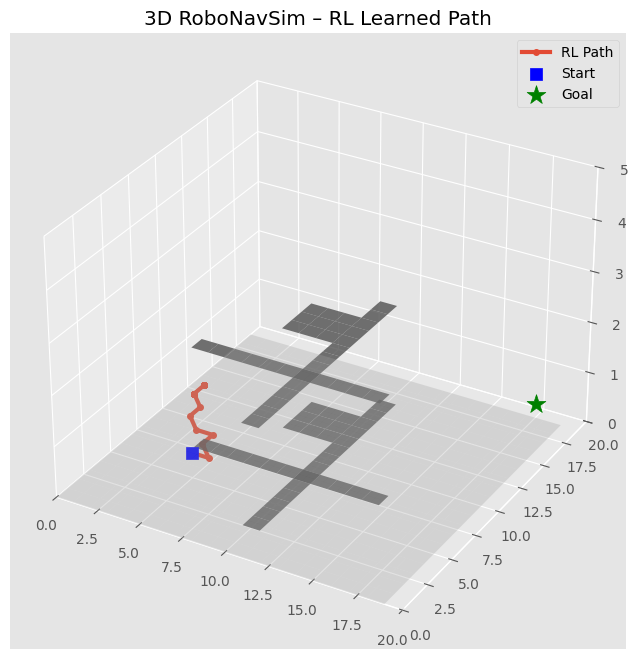

In [55]:
def draw_scene_with_rl_path(path_3d, title="3D RoboNavSim – RL Learned Path"):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    # Ground plane
    X, Y = np.meshgrid(np.arange(0, size), np.arange(0, size))
    Z = np.zeros_like(X)
    ax.plot_surface(X, Y, Z, color="lightgray", alpha=0.3)

    # Obstacles
    for (ox, oy) in obstacles:
        draw_obstacle_cube(ax, ox, oy, height=2, color="dimgray")

    # Validate the RL path
    if isinstance(path_3d, np.ndarray) and path_3d.shape[0] > 0:
        xs = path_3d[:, 0]
        ys = path_3d[:, 1]
        zs = path_3d[:, 2] + 0.5

        # Draw RL learned path
        ax.plot(xs, ys, zs, linewidth=3, marker="o", markersize=4, label="RL Path")

        # Mark start & goal
        ax.scatter(xs[0], ys[0], zs[0], color="blue", s=80, marker="s", label="Start")
        ax.scatter(
            goal_pos[0], goal_pos[1], 0.5,
            color="green", s=200, marker="*", label="Goal"
        )
    else:
        ax.text(
            size/2, size/2, 1,
            "No RL path found",
            color="red", fontsize=12
        )

    ax.set_title(title)
    ax.set_xlim(0, size)
    ax.set_ylim(0, size)
    ax.set_zlim(0, 5)
    ax.legend()
    plt.show()


# Convert RL 2D path into 3D path with z=0 (safe conversion)
rl_path_3d = np.array([[int(x), int(y), 0] for (x, y) in rl_path_xy])

# Draw the RL path
draw_scene_with_rl_path(rl_path_3d)

Level 6: Value Function & Policy Map Visualization

In [56]:
# Compute state-value (max Q) and greedy policy (best action) for each cell
V = np.full((size, size), np.nan)   # value function
policy_dx = np.zeros((size, size))
policy_dy = np.zeros((size, size))

for x in range(size):
    for y in range(size):
        if (x, y) in obstacle_set:
            continue  # keep as NaN so obstacles show clearly

        q_values = Q[x, y, :]
        best_q = np.max(q_values)
        best_a = np.argmax(q_values)

        V[x, y] = best_q

        dx, dy = ACTIONS[best_a]
        policy_dx[x, y] = dx
        policy_dy[x, y] = dy

2. Heatmap of Learned Value Function

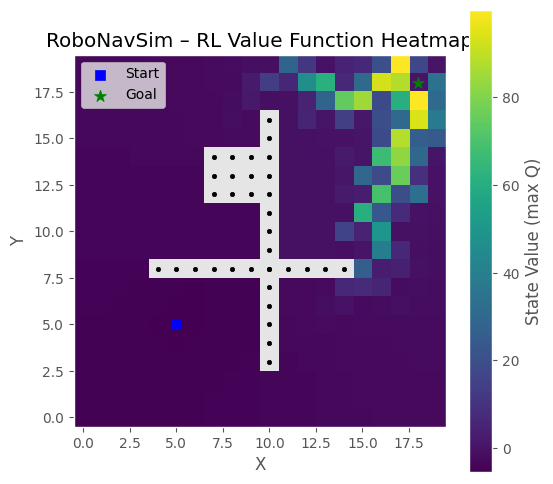

In [58]:
plt.figure(figsize=(6,6))
# Show V transposed so it aligns visually with our grid
img = plt.imshow(V.T, origin="lower")
plt.colorbar(img, label="State Value (max Q)")
plt.title("RoboNavSim – RL Value Function Heatmap")
plt.xlabel("X")
plt.ylabel("Y")

# Mark obstacles in black
for (ox, oy) in obstacles:
    plt.scatter(ox, oy, color="black", s=10)

# Define start_pos for plotting
start_pos = path_level3[0]

# Mark start and goal
plt.scatter(int(start_pos[0]), int(start_pos[1]), color="blue", s=50, marker="s", label="Start")
plt.scatter(int(goal_pos[0]), int(goal_pos[1]), color="green", s=80, marker="*", label="Goal")

plt.legend(loc="upper left")
plt.grid(False)
plt.show()

Policy Arrows: Which Way the Agent Wants to Move

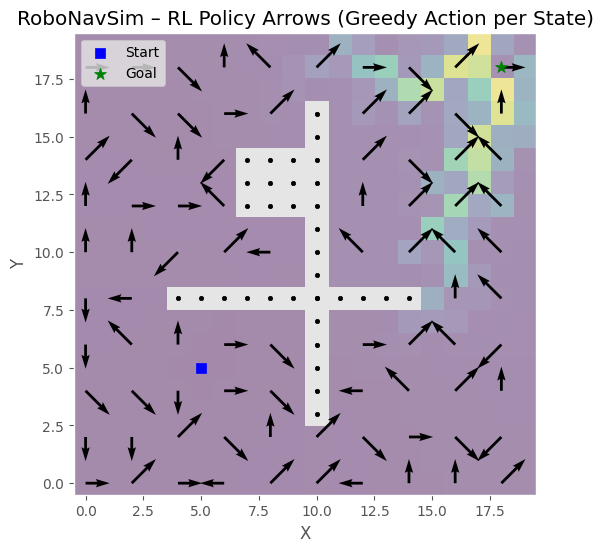

In [59]:
# Create a coarse grid so arrows are readable (e.g., every 2 cells)
step = 2
Xg, Yg = np.meshgrid(np.arange(0, size, step), np.arange(0, size, step))

U = np.zeros_like(Xg, dtype=float)  # dx
Vv = np.zeros_like(Yg, dtype=float) # dy

for i in range(Xg.shape[0]):
    for j in range(Xg.shape[1]):
        x = Xg[i, j]
        y = Yg[i, j]
        if (x, y) in obstacle_set:
            U[i, j] = 0
            Vv[i, j] = 0
        else:
            U[i, j] = policy_dx[x, y]
            Vv[i, j] = policy_dy[x, y]

plt.figure(figsize=(6,6))
plt.imshow(V.T, origin="lower", alpha=0.4)  # faint background from value function
plt.quiver(Xg, Yg, U, Vv, color="black")

# Mark obstacles, start, goal
for (ox, oy) in obstacles:
    plt.scatter(ox, oy, color="black", s=10)

plt.scatter(int(start_pos[0]), int(start_pos[1]), color="blue", s=50, marker="s", label="Start")
plt.scatter(int(goal_pos[0]), int(goal_pos[1]), color="green", s=80, marker="*", label="Goal")

plt.title("RoboNavSim – RL Policy Arrows (Greedy Action per State)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="upper left")
plt.grid(False)
plt.show()

Visualization Of The Robot Paths:
To gain a clearer insight into the learning outcomes of the reinforcement learning agent, I visualized both the state-value function and the greedy policy derived from the Q-table. For each grid cell, I calculated the maximum Q-value across all actions, resulting in a value function that peaks near the goal and diminishes around obstacles and boundaries. Subsequently, I extracted the greedy action for each state and represented it as a vector field, where arrows denote the preferred movement direction from each cell. These visualizations illustrate that the agent has acquired the ability to navigate around obstacles and generally progress toward the goal, offering a comprehensible perspective of the learned navigation strategy instead of viewing the Q-learning model as a black box.